# Converting images from one color space to another

This recipe tells you about color space conversion. By default, full color images in OpenCV are presented in __RGB__ color space. But for some cases it's necessary to move to other color representations; for example, to have a separate channel for intensity. Here we consider ways to change the color space of an image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
image_float32_
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] ]  image_float32_: float32
image_float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] ]  image_float32: float32


<Figure size 432x432 with 0 Axes>

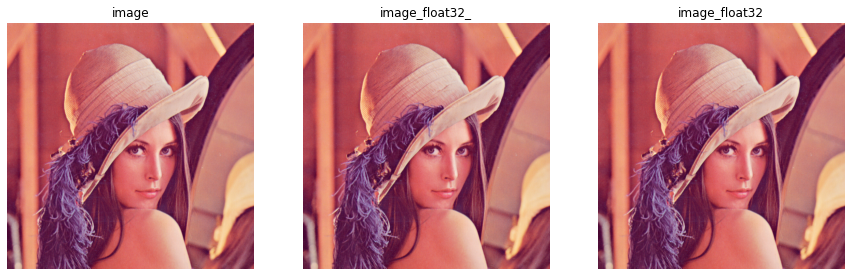

In [2]:
import cv2

image = cv2.imread('data/Lena.png')
image_float32_ = cv2.imread('data/Lena.png').astype(np.float32) / 255
image_float32 = np.copy(image).astype(np.float32) / 255


##################################################
print_image('image', 'image',  image,0,1,0,8)
print_image('image_float32_', 'image_float32_',  image_float32_,0,1,0,8)
print_image('image_float32', 'image_float32',  image_float32,0,1,0,8)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32_",image_float32_[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]]  
                   ])

cv2.imshow('original', image)
cv2.imshow('image_float32_, image_float32', np.hstack([image_float32_, image_float32]))
cv2.waitKey()
cv2.destroyAllWindows()

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] [127 140 227] [119 136 225] ]  image: uint8
Converted to grayscale
  Shape: (512, 512)   Data type: float32
[ 0.6362471 0.6362471 0.6363059 0.63176864 0.63631374 0.61380786 0.64000005 0.6300667 ]  gray: float32


<Figure size 432x432 with 0 Axes>

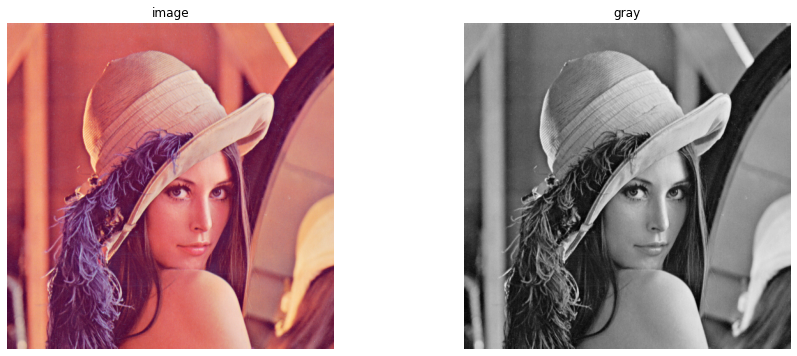

In [3]:
print_image('image', 'image',  image,0,1,0,10)

# By default, full color images in OpenCV are presented in RGB color space.
# But for some cases it's necessary to move to other color 
# representations; for example, to have a separate channel for intensity. 
# Here we consider ways to change the color space of an image.

# Special value: cv2.COLOR_BGR2GRAY

gray = cv2.cvtColor(image_float32, cv2.COLOR_BGR2GRAY)


##################################################
print_image('Converted to grayscale', 'gray',  gray,0,1,0,8)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["gray",gray]  
                   ])

cv2.imshow('image', image)
cv2.imshow('to_gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

Convert the image to __HSV__ color space

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
Converted to HSV
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 226] [  4 114 226] [  1 103 223] [  3 109 223] [  5 120 226] [  4 124 226] [  4 117 228] [  3 116 227] ]  hsv: uint8


<Figure size 432x432 with 0 Axes>

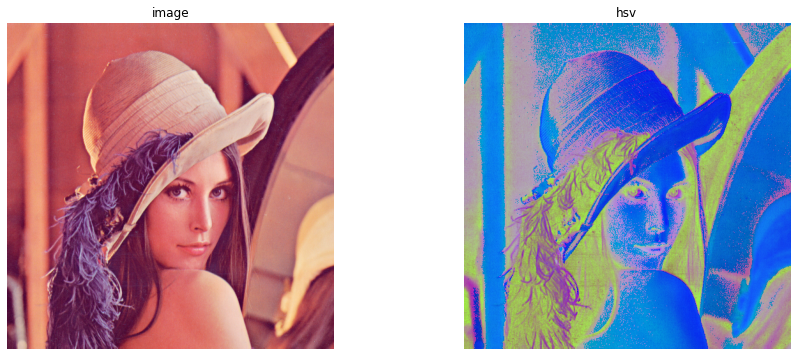

In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


##################################################
print_image('image', 'image',  image,0,1,0,8)
print_image('Converted to HSV', 'hsv',  hsv,0,1,0,8)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["hsv",hsv]  
                   ])

cv2.imshow('image, hsv', np.hstack([image, hsv]))
cv2.waitKey()
cv2.destroyAllWindows()

Convert the image from __HSV__ to the __RGB__ color space:

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
hsv
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 226] [  4 114 226] [  1 103 223] [  3 109 223] [  5 120 226] [  4 124 226] [  4 117 228] [  3 116 227] ]  hsv: uint8
Converted back to BGR from HSV -> BGR
  Shape: (512, 512, 3)   Data type: uint8
[ [124 138 226] [124 138 226] [132 135 223] [127 137 223] [119 137 226] [116 130 226] [123 137 228] [123 134 227] ]  from_hsv: uint8


<Figure size 432x432 with 0 Axes>

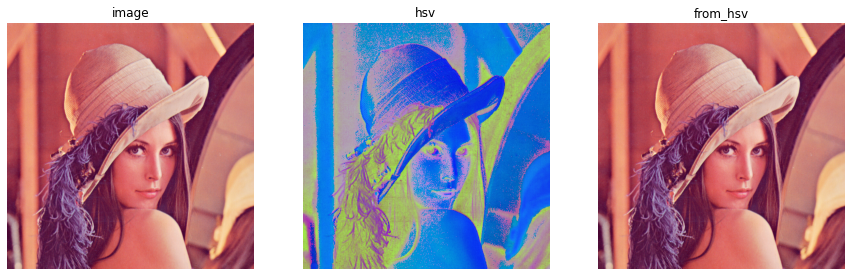

In [5]:
from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


#############################################
#hsv[:, :, 2] *= 2
print_image('image', 'image',  image,0,1,0,8)
print_image('hsv', 'hsv',  hsv,0,1,0,8)
print_image('Converted back to BGR from HSV -> BGR', 'from_hsv',  from_hsv,0,1,0,8)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["hsv",hsv],
                    ["from_hsv",from_hsv[:,:,[2,1,0]]]
                   ])

cv2.imshow('image, hsv, Converted back to BGR from HSV -> BGR', np.hstack([image, hsv,from_hsv]))
cv2.waitKey()
cv2.destroyAllWindows()

Increase the brightness of the image by multiplying the V channel by some value == 2. Then convert the image to the __RGB__ color space:

In [6]:
hsv2 = np.copy(hsv)
hsv2[:, :, 2] *= 2

hsv2_BGR = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)


###############################################
print_image('image', 'image',  image,0,1,0,8)
print_image('hsv', 'hsv',  hsv,0,1,0,8)
print_image('hsv *2', 'hsv2',  hsv2,0,1,0,8)
print_image('Converted from HSV *2 -> BGR', 'hsv2_BGR',  hsv2_BGR,0,1,0,8)

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
hsv
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 226] [  4 114 226] [  1 103 223] [  3 109 223] [  5 120 226] [  4 124 226] [  4 117 228] [  3 116 227] ]  hsv: uint8
hsv *2
  Shape: (512, 512, 3)   Data type: uint8
[ [  4 114 196] [  4 114 196] [  1 103 190] [  3 109 190] [  5 120 196] [  4 124 196] [  4 117 200] [  3 116 198] ]  hsv2: uint8
Converted from HSV *2 -> BGR
  Shape: (512, 512, 3)   Data type: uint8
[ [108 120 196] [108 120 196] [113 115 190] [108 116 190] [103 119 196] [100 113 196] [108 120 200] [107 116 198] ]  hsv2_BGR: uint8


<Figure size 1152x720 with 0 Axes>

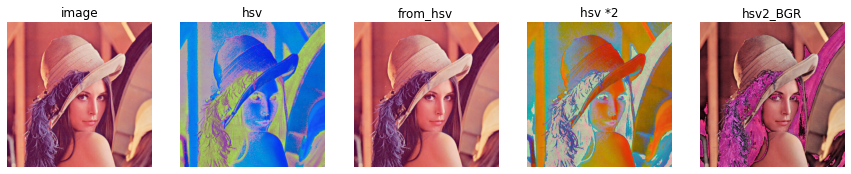

In [7]:
plt.figure(figsize=(16,10))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["hsv",hsv],
                    ["from_hsv",from_hsv[:,:,[2,1,0]]],
                    ["hsv *2",hsv2[:,:,[2,1,0]]],
                    ["hsv2_BGR",hsv2_BGR[:,:,[2,1,0]]]
                   ])

cv2.imshow('image, hsv, Converted back to BGR from HSV -> BGR', np.hstack([image, hsv,from_hsv]))
cv2.imshow('hsv, HSV *2, HSV *2 -> BGR , ', np.hstack([hsv,hsv2, hsv2_BGR]))
cv2.waitKey()
cv2.destroyAllWindows()